### **K-Means Clustering**
**Overview**:  
K-Means is one of the most popular clustering algorithms, used for unsupervised learning. It partitions a dataset into *k* distinct, non-overlapping subsets (clusters). The goal is to minimize the variance within each cluster.  

**Steps**:
1. **Initialization**: Choose *k* initial centroids (randomly or using methods like K-Means++ to improve efficiency).
2. **Assignment Step**: Assign each data point to the closest centroid based on Euclidean distance.
3. **Update Step**: Recalculate the centroid of each cluster based on the points assigned to it.
4. Repeat steps 2 and 3 until convergence (when centroids no longer change).

**Formula**:
- **Euclidean Distance**: Used to assign points to the closest cluster.
  \[
  \text{Distance}(p, c) = \sqrt{\sum_{i=1}^{n} (x_i - c_i)^2}
  \]
  where \( p \) is a data point and \( c \) is the centroid.

**Libraries**:
- `sklearn`: KMeans from `sklearn.cluster`
- `scipy`: For distance calculations


**Use Cases**:
- Customer segmentation
- Market basket analysis
- Image compression

**Pros**:
- Simple to implement and understand
- Computationally efficient for large datasets
- Works well when clusters are spherical and equally sized

**Cons**:
- Requires the number of clusters (*k*) to be pre-specified
- Sensitive to initial centroid placement
- Struggles with clusters of non-convex shapes

---


### **Summary of Pros and Cons**:

| Algorithm | Pros | Cons |
|-----------|------|------|
| **K-Means** | Efficient, simple, good for spherical clusters | Needs pre-specified *k*, sensitive to initialization |
| **Prototype-based** | Efficient for high-dimensional data, easy to interpret | Sensitive to initial prototypes, struggles with non-linear clusters |
| **Hierarchical** | No need to specify *k*, captures hierarchical relationships | Computationally expensive, sensitive to noise |
| **Density-based (DBSCAN)** | Can find clusters of arbitrary shape, robust to noise | Hard to choose optimal parameters, struggles with varying density |
| **Distribution-based** | Works well with probabilistic data, models complex distributions | Assumes a specific distribution, computationally intensive |

These clustering techniques are used in a variety of domains including machine learning, image analysis, pattern recognition, customer segmentation, and anomaly detection, depending on the nature and structure of the data.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

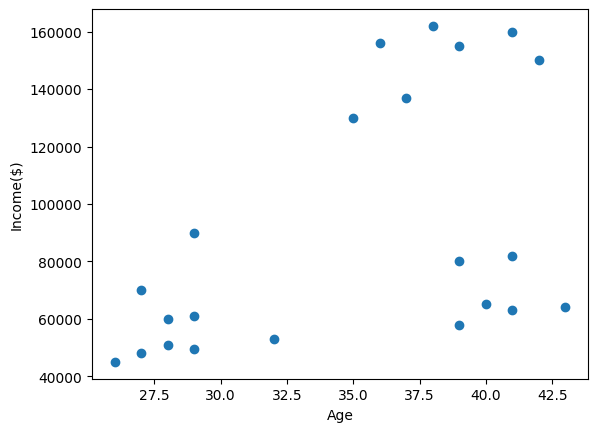

In [3]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']]) 
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [5]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [7]:
 df1 = df[df.cluster==0]
 df2 = df[df.cluster==1]
 df3 = df[df.cluster==2]

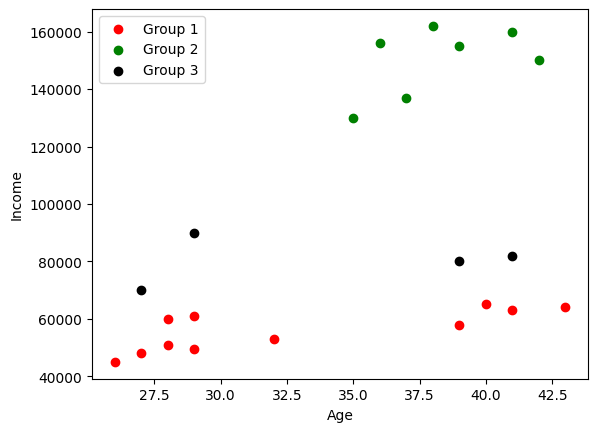

In [8]:
plt.scatter(df1.Age, df1['Income($)'], color='red', label='Group 1')
plt.scatter(df2.Age, df2['Income($)'], color='green', label='Group 2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Group 3')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend() 
plt.show()

In [9]:
scaler = MinMaxScaler() 
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [10]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


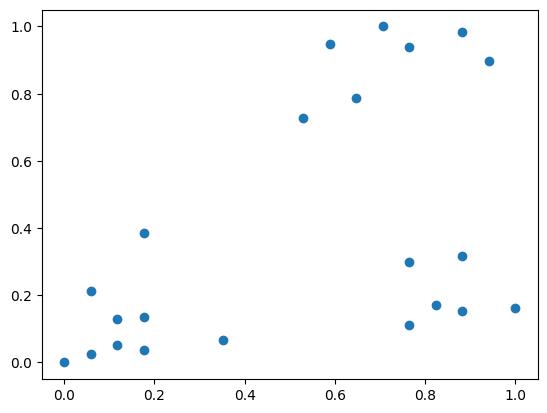

In [11]:
plt.scatter(df.Age, df['Income($)'])

In [12]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']]) 
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [14]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [15]:
 df1 = df[df.cluster==0]
 df2 = df[df.cluster==1]
 df3 = df[df.cluster==2]

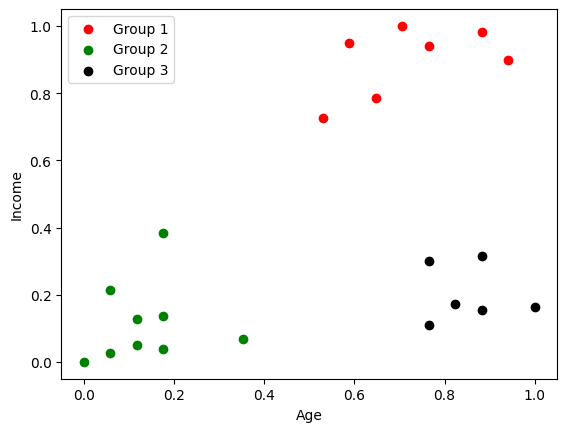

In [16]:
plt.scatter(df1.Age, df1['Income($)'], color='red', label='Group 1')
plt.scatter(df2.Age, df2['Income($)'], color='green', label='Group 2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Group 3')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend() 
plt.show()

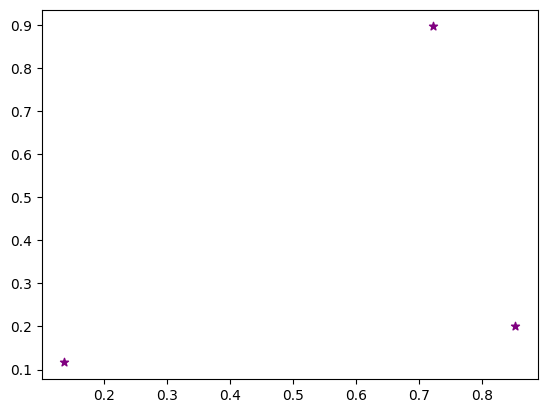

In [17]:
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centeriod')

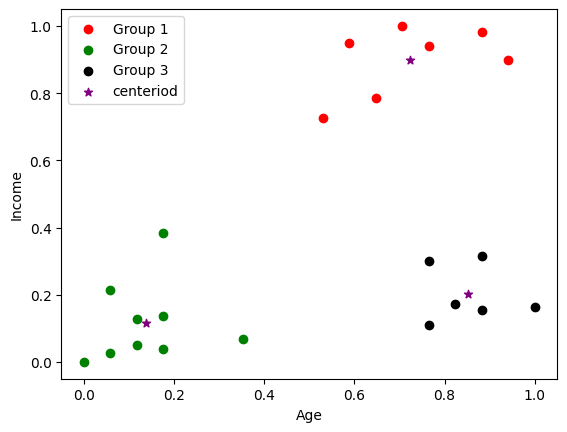

In [18]:
plt.scatter(df1.Age, df1['Income($)'], color='red', label='Group 1')
plt.scatter(df2.Age, df2['Income($)'], color='green', label='Group 2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Group 3')
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centeriod')
plt.legend() 
plt.show()

In [19]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [20]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.3168251248538416,
 0.2400451151098092,
 0.22351524226635136,
 0.1327661931978319,
 0.11793228590762087]

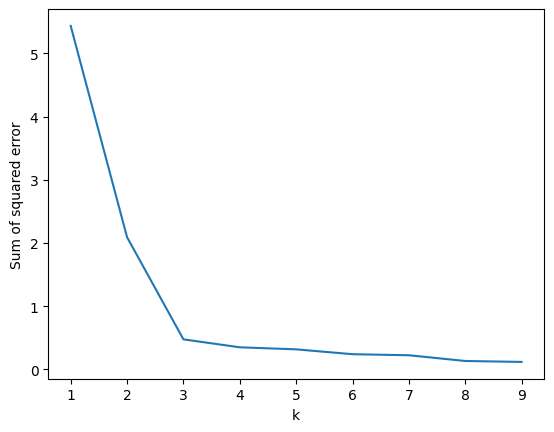

In [21]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

## Exercise
Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
data['flower'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
data.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [27]:
model = KMeans(n_clusters=3)
pred_y = model.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
data['cluster'] = pred_y
data.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [29]:
data.cluster.unique()

array([1, 2, 0])

In [30]:
model.cluster_centers_

array([[5.62608696, 2.04782609],
       [1.462     , 0.246     ],
       [4.29259259, 1.35925926]])

In [31]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

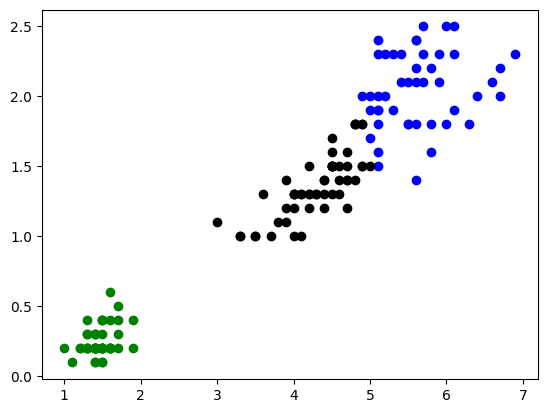

In [32]:
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='blue')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='green')
plt.scatter(data3['petal length (cm)'],data3['petal width (cm)'],color='black')

In [33]:
data.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [34]:
scaler = MinMaxScaler()
scaler.fit(data[['petal length (cm)']])
data[['petal length (cm)']] = scaler.transform(data[['petal length (cm)']])

scaler.fit(data[['petal width (cm)']])
data[['petal width (cm)']] = scaler.transform(data[['petal width (cm)']])

data.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


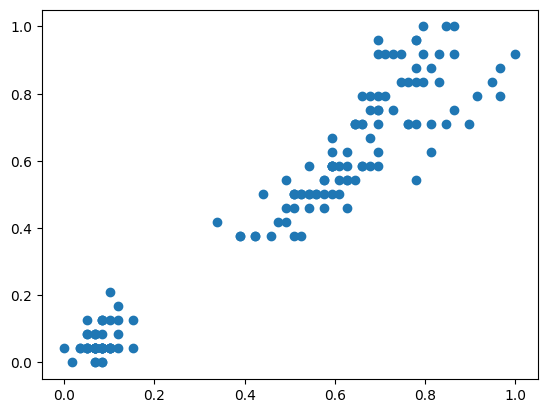

In [35]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])

In [36]:
model = KMeans(n_clusters=3)
pred_y = model.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
data['cluster'] = pred_y
data.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [38]:
model.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [39]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

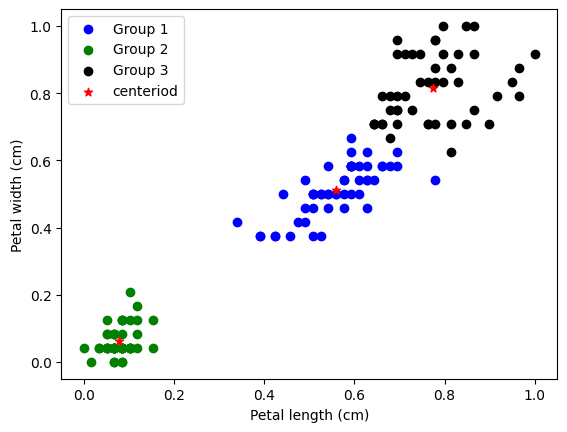

In [40]:
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='blue', label='Group 1')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='green', label='Group 2')
plt.scatter(data3['petal length (cm)'],data3['petal width (cm)'],color='black', label='Group 3')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1],color='red', marker='*', label='centeriod')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()

**Elbow Plot**

In [41]:
sse =[]
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(data)
    sse.append(model.inertia_)

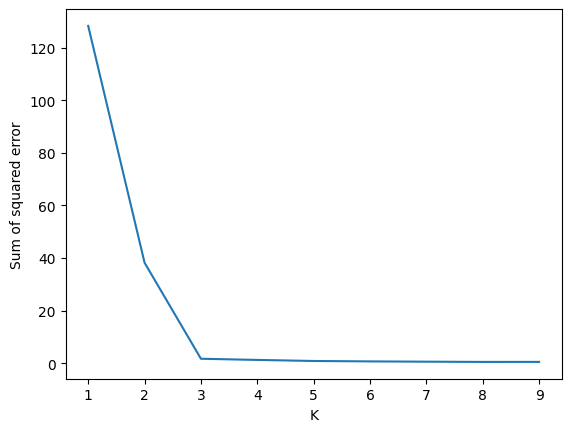

In [42]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

### Example
**Mall Customers**

In [43]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
mall_x = mall.iloc[:, [3, 4]].values
mall_x.shape

(200, 2)

Finding the optimal number of clusters using the elbow method

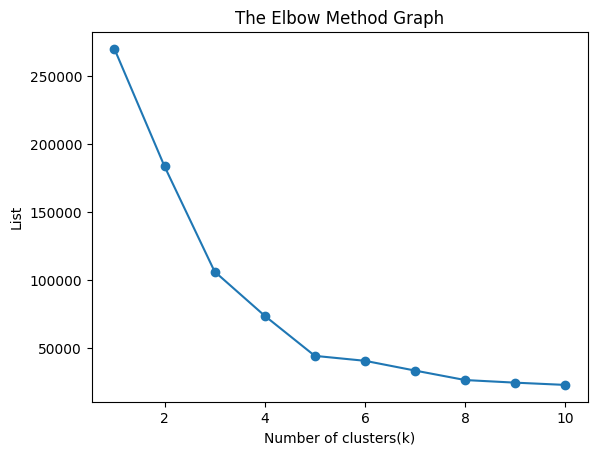

In [54]:
list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(mall_x)
    list.append(kmeans.inertia_)

plt.scatter(range(1, 11), list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('List')  
plt.plot(range(1, 11), list)  
plt.show()  

In [57]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict = kmeans.fit_predict(mall_x)  

In [67]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

**visulaizing the clusters** 

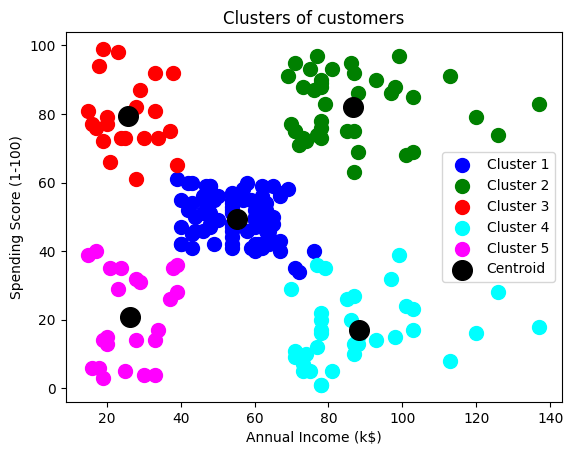

In [65]:
plt.scatter(mall_x[y_predict == 0, 0], mall_x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
plt.scatter(mall_x[y_predict == 1, 0], mall_x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(mall_x[y_predict== 2, 0], mall_x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(mall_x[y_predict == 3, 0], mall_x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(mall_x[y_predict == 4, 0], mall_x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

### **Prototype-based Clustering**
**Overview**:  
This type of clustering algorithm uses prototypes to represent the clusters. The "prototype" is the center of a cluster, which can be calculated in various ways, such as using centroids in K-Means.

**Use Cases**:
- When the data can be represented by prototypes, like in image compression or document classification.

**Pros**:
- Efficient for high-dimensional data
- Produces clear and easy-to-interpret clusters

**Cons**:
- The result is sensitive to the initial prototype selection
- Doesn't work well with non-linear clusters

---

### **Hierarchical Clustering**
**Overview**:  
Hierarchical clustering builds a tree (dendrogram) of clusters. It can be either agglomerative (bottom-up) or divisive (top-down). Agglomerative is more common: each data point starts as its own cluster, and pairs of clusters are merged as we move up the hierarchy.

**Steps**:
1. Compute the distance between all pairs of points (or clusters).
2. Merge the closest pair of clusters.
3. Repeat the merging until only one cluster remains.

**Formula**:  
- **Single Linkage** (min distance between clusters):  
  \[
  d(A, B) = \min\{d(a, b) \mid a \in A, b \in B\}
  \]
- **Complete Linkage** (max distance):  
  \[
  d(A, B) = \max\{d(a, b) \mid a \in A, b \in B\}
  \]
  
**Libraries**:  
- `scipy.cluster.hierarchy`: `linkage`, `dendrogram`
  
**Use Cases**:
- Gene expression analysis
- Market basket analysis
- Document clustering

**Pros**:
- No need to specify the number of clusters beforehand
- Can capture hierarchical relationships in the data

**Cons**:
- Computationally expensive for large datasets
- Sensitive to noise and outliers

---


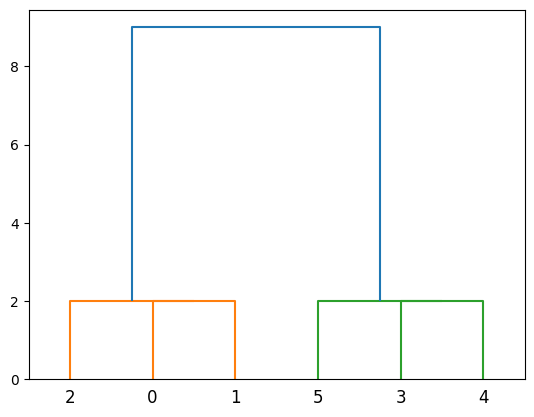

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Sample data
X = [[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]]

# Perform hierarchical/agglomerative clustering
Z = linkage(X, 'single')

# Plot the dendrogram
dendrogram(Z)
plt.show()

### **Distribution-Based Clustering**
**Overview**:  
In distribution-based clustering, clusters are assumed to be drawn from different statistical distributions. This type is based on probabilistic models, where the goal is to maximize the likelihood of the observed data given a mixture of distributions.

**Use Cases**:
- When the data is assumed to follow a known distribution (e.g., Gaussian Mixture Models).

**Libraries**:
- `sklearn.mixture`: GaussianMixture for Gaussian Mixture Models (GMM)

**Pros**:
- Can model more complex distributions
- Works well for data assumed to have a probabilistic nature

**Cons**:
- Assumes that the data follows a particular distribution
- More computationally intensive than other clustering methods

---

In [73]:
from sklearn.mixture import GaussianMixture

# Sample data
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)
print("Cluster labels:", labels)

Cluster labels: [0 0 0 1 1 1]


### **Density-Based Clustering**
**Overview**:  
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) identifies clusters of varying shapes and sizes by looking for regions of high point density. It uses two parameters: *epsilon* (the neighborhood radius) and *min_samples* (the minimum number of points in a neighborhood for a point to be considered part of a cluster).

**Steps**:
1. Mark points as core, border, or noise based on density.
2. Expand clusters from core points by adding reachable points.
3. Merge clusters if they are adjacent.

**Formula**:  
DBSCAN relies on two concepts:
- **Epsilon neighborhood**: 
  \[
  \text{Neighborhood}(p) = \{ q \mid \text{distance}(p, q) \leq \epsilon \}
  \]
- **Core points**: Points with at least `min_samples` points within their epsilon neighborhood.

**Libraries**:
- `sklearn.cluster.DBSCAN`

**Use Cases**:
- Noise filtering
- Spatial data analysis
- Anomaly detection

**Pros**:
- Can find clusters of arbitrary shape
- Robust to noise and outliers

**Cons**:
- Choosing optimal parameters can be difficult
- Doesn't perform well with varying density clusters

---

In [74]:
from sklearn.cluster import DBSCAN

# Sample data
X = np.array([[1, 2], [2, 3], [2, 2], [8, 7], [8, 8], [25, 80]])

# DBSCAN clustering with eps=3 and min_samples=2
db = DBSCAN(eps=3, min_samples=2).fit(X)

# Getting the labels
print("Cluster labels:", db.labels_)

Cluster labels: [ 0  0  0  1  1 -1]
